In [2]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

In [3]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(4)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKDK, KDKQ, DKQK, KQKK, QKKK, KKKK, KKKE, KKE..."
1,"[MSWS, SWSG, WSGL, SGLL, GLLH, LLHG, LHGL, HGL..."
2,"[MSLF, SLFD, LFDL, FDLF, DLFR, LFRG, FRGF, RGF..."
3,"[MAVA, AVAP, VAPR, APRL, PRLF, RLFG, LFGG, FGG..."
4,"[MSTI, STIQ, TIQS, IQSE, QSET, SETD, ETDC, TDC..."
...,...
6265,"[MSYF, SYFG, YFGE, FGEH, GEHF, EHFW, HFWG, FWG..."
6266,"[MTVG, TVGK, VGKS, GKSS, KSSK, SSKM, SKML, KML..."
6267,"[MNNL, NNLS, NLSF, LSFS, SFSE, FSEL, SELC, ELC..."
6268,"[MAPE, APEI, PEIN, EINL, INLP, NLPG, LPGP, PGP..."


Median length of Human sequence is 477


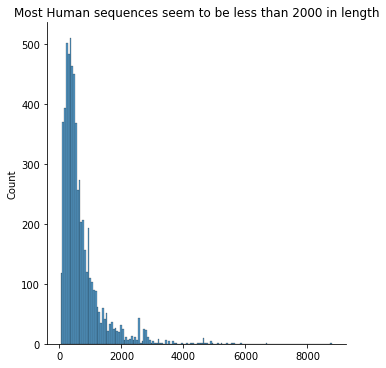

In [ ]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 334


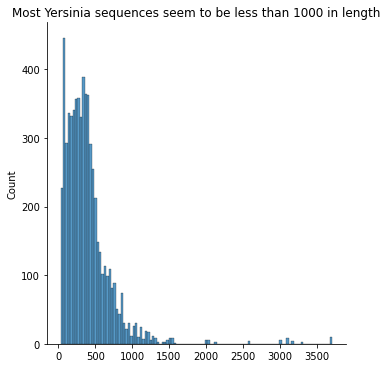

In [ ]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

MAX_VOCAB_SIZE is 50000
MAX_SEQUENCE_LENGTH is 2000
max sequences1_train length: 6264
min sequences1_train length: 21
median sequences1_train length: 328


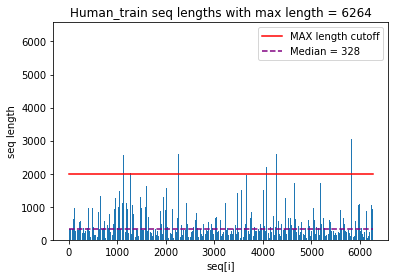

max word index sequences1_train: 49999
max sequences2_train length: 3565
min sequences2_train length: 15
median sequences2_train length: 246


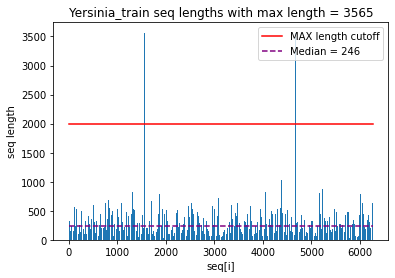

max word index sequences2_train: 49999
Found 155225 unique tokens in tokenizer1.
Found 134906 unique tokens in tokenizer2.
pre padding
Shape of data1 tensor: (6270, 2000)
Shape of data2 tensor: (6270, 2000)
max test_sequences1 length: 4337
min test_sequences1 length: 22
median test_sequences1 length: 332


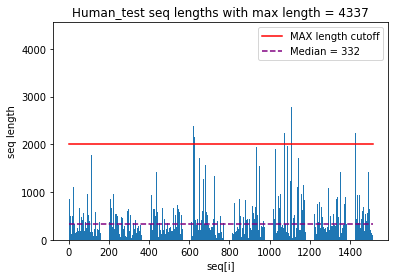

max test_sequences2 length: 3565
min test_sequences2 length: 15
median test_sequences2 length: 235


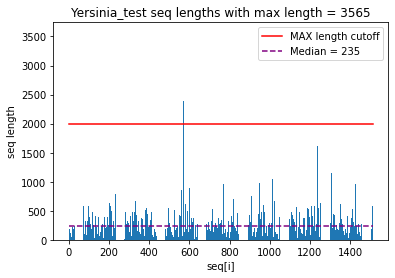

pre padding for test seq.
Shape of test_data1 tensor: (1514, 2000)
Shape of test_data2 tensor: (1514, 2000)
num_words is 50000


In [4]:
data1_4D_doubleip_pre,data2_4D_doubleip_pre,data1_test_4D_doubleip_pre,data2_test_4D_doubleip_pre,num_words_4D,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_doubleip(50000,2000,df_train,df_test,pad = 'pre', show = True)

In [5]:
data1_4D_doubleip_center,data2_4D_doubleip_center,data1_test_4D_doubleip_center,data2_test_4D_doubleip_center,num_words_4D,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_doubleip(50000,2000,df_train,df_test)

MAX_VOCAB_SIZE is 50000
MAX_SEQUENCE_LENGTH is 2000
max sequences1_train length: 6264
min sequences1_train length: 21
median sequences1_train length: 328
max word index sequences1_train: 49999
max sequences2_train length: 3565
min sequences2_train length: 15
median sequences2_train length: 246
max word index sequences2_train: 49999
Found 155225 unique tokens in tokenizer1.
Found 134906 unique tokens in tokenizer2.
Center padding
Shape of data1 tensor: (6270, 2000)
Shape of data2 tensor: (6270, 2000)
max test_sequences1 length: 4337
min test_sequences1 length: 22
median test_sequences1 length: 332
max test_sequences2 length: 3565
min test_sequences2 length: 15
median test_sequences2 length: 235
Center padding for test seq.
Shape of test_data1 tensor: (1514, 2000)
Shape of test_data2 tensor: (1514, 2000)
num_words is 50000


In [6]:
data1_4D_doubleip_post,data2_4D_doubleip_post,data1_test_4D_doubleip_post,data2_test_4D_doubleip_post,num_words_4D,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_doubleip(50000,2000,df_train,df_test,pad = 'post')

MAX_VOCAB_SIZE is 50000
MAX_SEQUENCE_LENGTH is 2000
max sequences1_train length: 6264
min sequences1_train length: 21
median sequences1_train length: 328
max word index sequences1_train: 49999
max sequences2_train length: 3565
min sequences2_train length: 15
median sequences2_train length: 246
max word index sequences2_train: 49999
Found 155225 unique tokens in tokenizer1.
Found 134906 unique tokens in tokenizer2.
post padding
Shape of data1 tensor: (6270, 2000)
Shape of data2 tensor: (6270, 2000)
max test_sequences1 length: 4337
min test_sequences1 length: 22
median test_sequences1 length: 332
max test_sequences2 length: 3565
min test_sequences2 length: 15
median test_sequences2 length: 235
post padding for test seq.
Shape of test_data1 tensor: (1514, 2000)
Shape of test_data2 tensor: (1514, 2000)
num_words is 50000


In [7]:
EMBEDDING_DIM_4D = 20
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5
M_4D=50

x1 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D, M_4D)
x2 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D, M_4D)
x3 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D, M_4D)
x4 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D, M_4D)
x5 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D, M_4D)
x6 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D, M_4D)

concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output, x3.output, x4.output, x5.output, x6.output])
x = Dense(128)(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model4D_doubleip = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input], outputs=output)

model4D_doubleip.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
#plot_model(model4D_doubleip, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

trains = [data1_4D_doubleip_pre,data2_4D_doubleip_pre,data1_4D_doubleip_center,data2_4D_doubleip_center,data1_4D_doubleip_post,data2_4D_doubleip_post]
tests = [data1_test_4D_doubleip_pre,data2_test_4D_doubleip_pre,data1_test_4D_doubleip_center,data2_test_4D_doubleip_center,data1_test_4D_doubleip_post,data2_test_4D_doubleip_post]

jk = model4D_doubleip.fit(trains, df_train['label'].values, epochs=EPOCHS, validation_data=(tests, df_test['label'].values),batch_size=BATCH_SIZE)
print(roc_auc_score(df_test['label'].values, model4D_doubleip.predict(tests)))

Epoch 1/5
49/49 [==============================] - 98s 1s/step - loss: 1.8917 - accuracy: 0.5272 - val_loss: 0.5835 - val_accuracy: 0.6843
Epoch 2/5
49/49 [==============================] - 62s 1s/step - loss: 0.4403 - accuracy: 0.8055 - val_loss: 0.4788 - val_accuracy: 0.7801
Epoch 3/5
49/49 [==============================] - 62s 1s/step - loss: 0.2496 - accuracy: 0.9086 - val_loss: 0.4612 - val_accuracy: 0.7979
Epoch 4/5
49/49 [==============================] - 62s 1s/step - loss: 0.1935 - accuracy: 0.9307 - val_loss: 0.5081 - val_accuracy: 0.7642
Epoch 5/5
49/49 [==============================] - 63s 1s/step - loss: 0.1675 - accuracy: 0.9362 - val_loss: 0.5713 - val_accuracy: 0.7827
0.8491629860622738


In [ ]:
#model4D_doubleip.save('/content/drive/MyDrive/ML_Data/model4D_doubleip.h5')0.85857